# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import requests
from bs4 import BeautifulSoup

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# New York Times Data

In [ ]:
nyTimesData = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")#.set_index(["date", "state", "county"])

nyTimesDataAdded2 = pd.DataFrame()

for state_name, state in nyTimesData.groupby("state"):
  nyTimesDataAdded = pd.DataFrame()
  for county_name, county in state.groupby("county"):
    county["new cases"] = county["cases"].diff()
    county["new deaths"] = county["deaths"].diff()
    nyTimesDataAdded = pd.concat([nyTimesDataAdded, county])
  nyTimesDataAdded2 = pd.concat([nyTimesDataAdded2, nyTimesDataAdded])
  print(state_name)

nyTimesData = nyTimesDataAdded2.reset_index(drop = True).set_index(["date", "county", "state"]).drop("fips", axis = 1)
nyTimesData

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Guam
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Northern Mariana Islands
Ohio
Oklahoma
Oregon
Pennsylvania
Puerto Rico
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virgin Islands
Virginia
Washington
West Virginia
Wisconsin
Wyoming


,,,cases,deaths,new cases,new deaths
date,county,state,,,,
2020-03-24,Autauga,Alabama,1,0,NaN,NaN
2020-03-25,Autauga,Alabama,4,0,3.0,0.0
2020-03-26,Autauga,Alabama,6,0,2.0,0.0
2020-03-27,Autauga,Alabama,6,0,0.0,0.0
2020-03-28,Autauga,Alabama,6,0,0.0,0.0
...,...,...,...,...,...,...
2020-08-12,Weston,Wyoming,5,0,0.0,0.0
2020-08-13,Weston,Wyoming,5,0,0.0,0.0
2020-08-14,Weston,Wyoming,5,0,0.0,0.0


In [ ]:
nyTimesData.xs("Kansas", level = "state").xs("Douglas", level = "county")

,cases,deaths,new cases,new deaths
date,,,,
2020-03-17,1,0,NaN,NaN
2020-03-18,1,0,0.0,0.0
2020-03-19,1,0,0.0,0.0
2020-03-20,1,0,0.0,0.0
2020-03-21,3,0,2.0,0.0
...,...,...,...,...
2020-08-12,765,5,15.0,0.0
2020-08-13,783,5,18.0,0.0
2020-08-14,812,5,29.0,0.0


#Census Information

In [ ]:
URL = "https://www.census.gov/data/tables/time-series/demo/popest/2010s-counties-detail.html"
a = BeautifulSoup(requests.get(URL).text, "html.parser")
[i for i in [i for i in [i.get_attribute_list("class")[0] for i in a.find_all("div")] if i!=None] if i.startswith("state")]

age_html = [i for i in [i for i in  [i for i in [i for i in a.find_all("div") if len(i.get_attribute_list("class"))>0 ]]  if not( i.get_attribute_list("class")[0] in [None, ""])] if i.get_attribute_list("class")[0].startswith("state")][0]
age_databases = pd.DataFrame( data = [[i.get_text().strip(), i.get_attribute_list("href")[0] ] for i in age_html.find_all("a")], columns = ["State", "Link"]).set_index("State")
age_databases

,Link
State,
Alabama,//www2.census.gov/programs-surveys/popest/data...
Alaska,//www2.census.gov/programs-surveys/popest/data...
Arizona,//www2.census.gov/programs-surveys/popest/data...
Arkansas,//www2.census.gov/programs-surveys/popest/data...
California,//www2.census.gov/programs-surveys/popest/data...
Colorado,//www2.census.gov/programs-surveys/popest/data...
Connecticut,//www2.census.gov/programs-surveys/popest/data...
Delaware,//www2.census.gov/programs-surveys/popest/data...
District of Columbia,//www2.census.gov/programs-surveys/popest/data...


In [ ]:
main_df = pd.DataFrame()
state = age_databases.index[0]
for state in age_databases.index:
  try:
    x = pd.read_csv("https:" + age_databases["Link"].loc[state]).drop(["SUMLEV", "STNAME", "COUNTY"], axis = 1)
    x = x.groupby("CTYNAME").apply(np.mean).drop(["YEAR"], axis = 1).reset_index()
    x["STATE"] = state
    #x = x.set_index(["STATE", "CTYNAME"]).drop([i for i in x.columns if ("MALE" in i) or ("FEM" in i)], axis = 1)

    land_area = pd.read_html("https://en.wikipedia.org/wiki/List_of_counties_in_"+state.replace(" ", "_"))
    land_area = [i for i in land_area if len(i.columns) > 8][0]
    division = land_area.columns[0]
    land_area = land_area.drop(["Map"], axis = 1, errors = "ignore").set_index(division)
    land_area = land_area[ [ land_area.columns[-1]] ].applymap(lambda area: float("".join((area.split()[0]).split(",")))  ).rename(columns = {land_area.columns[-1]:"Land Area"}).applymap(round).reset_index()
    x = x.merge(land_area, left_on = "CTYNAME", right_on = division).drop([division], axis = 1)
    x["Population Density"] = x["POPESTIMATE"] / x["Land Area"]
    main_df = pd.concat([main_df, x])
    print(state)
  except:
    print(state + " (Could not add)")

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia (Could not add)
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico (Could not add)
New York
North Carolina
North Dakota (Could not add)
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [ ]:
main_df = main_df.rename(columns = {"CTYNAME":"County", "STATE":"State"}).set_index(["State", "County"])
full_information = main_df
main_df = main_df[["POPESTIMATE", "MEDIAN_AGE_TOT", "Land Area", "Population Density"]].rename(columns = dict(zip ( ["POPESTIMATE", "MEDIAN_AGE_TOT"], 
                                                                                                                    ["Population", "Median Age"]) ) )
main_df.xs("Kansas")


,Population,Median Age,Land Area,Population Density
County,,,,
Allen County,12958.416667,40.958333,503,25.762260
Anderson County,7932.333333,42.216667,583,13.606061
Atchison County,16564.666667,36.633333,432,38.344136
Barber County,4759.666667,44.875000,1134,4.197237
Barton County,27106.833333,39.616667,894,30.320843
...,...,...,...,...
Washington County,5635.666667,45.958333,898,6.275798
Wichita County,2185.333333,40.383333,719,3.039407
Wilson County,9005.333333,42.991667,574,15.688734


In [ ]:
df=main_df.xs("Kansas").drop('Land Area', axis=1)

In [ ]:
df

,Population,Median Age,Population Density
County,,,
Allen County,12958.416667,40.958333,25.762260
Anderson County,7932.333333,42.216667,13.606061
Atchison County,16564.666667,36.633333,38.344136
Barber County,4759.666667,44.875000,4.197237
Barton County,27106.833333,39.616667,30.320843
...,...,...,...
Washington County,5635.666667,45.958333,6.275798
Wichita County,2185.333333,40.383333,3.039407
Wilson County,9005.333333,42.991667,15.688734


In [ ]:
from google.colab import files
df.to_csv('test2.csv') 
files.download('test2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans as myModel

ST_NAME = "Kansas"

X_raw = main_df.xs(ST_NAME).drop("Land Area", axis = 1).reset_index()
X = X_raw.drop("County", axis = 1)


points = [[], []]
for i in range(10):
  clusters = myModel(n_clusters = i+1).fit(X)
  points[0].append(i+1)
  points[1].append(round(clusters.inertia_, 0))

first = points[1][0]
power = int(np.log10(first))-3
points[1] = list(map(lambda x: x/(10**power), points[1]))
pd.DataFrame(points, index = ["K", "Inertia (scaled down)"]).T.set_index("K")

,Inertia (scaled down)
K,
1.0,6182.414878
2.0,856.735544
3.0,276.156185
4.0,115.746586
5.0,62.839029
6.0,42.847239
7.0,23.413680
8.0,13.034969
9.0,9.345173


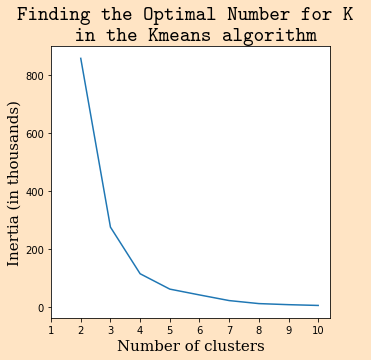

In [ ]:
fig = plt.figure(figsize = (5, 5), facecolor="bisque")
plt.plot(points[0][1:], points[1][1:])
plt.xticks(np.arange(1, 11))
plt.ylabel("Inertia (in thousands)", fontname = "Serif", fontsize = 15)
plt.xlabel("Number of clusters", fontname = "Serif", fontsize = 15)
plt.title("Finding the Optimal Number for K \n in the Kmeans algorithm", fontsize = 20, fontname = "cmtt10")
plt.show()

In [ ]:
inertia = pd.DataFrame(points[1], index = points[0], columns = ["Inertia"])
inertia["Second Derivative"] = inertia["Inertia"].diff()
inertia["Second Derivative"][:-1] = inertia["Second Derivative"][1:]
inertia["Second Derivative"] = inertia["Second Derivative"].diff()
inertia["Second Derivative"][:-1] = inertia["Second Derivative"][1:]
inertia["Scaled Second Derivative"] = inertia["Second Derivative"] / inertia["Second Derivative"].iloc[0]
good_cluster_estimate = inertia.query("`Scaled Second Derivative`<=0.01").iloc[0].name
print("\n\n\nLikely number of clusters: {} \n\n(for population size, population density, and median age)\n\n\n".
      format(good_cluster_estimate))




Likely number of clusters: 4 

(for population size, population density, and median age)





In [ ]:
clusters = myModel(n_clusters = 3).fit(X)
clustered_counties = pd.DataFrame(clusters.labels_, columns = ["Category"])
clustered_counties["County"] = X_raw["County"]
clustered_counties = clustered_counties[["County", "Category"]].set_index("County")

pd.DataFrame(clustered_counties.groupby("Category").apply(len), 
             columns = ["Counties per Category"])

,Counties per Category
Category,
0,96
1,2
2,7


In [ ]:
rolling_window = 14

counties = clustered_counties.query("Category == 2").index
counties = list(map(lambda county_name: county_name.split(" County")[0], counties))
state_level = nyTimesData.xs(ST_NAME, level = "state").reset_index()

relevant_counties = pd.DataFrame()

for county in counties:
  current_county_info = state_level[state_level["county"] == county]
  
  for field in current_county_info.columns:
    if not(field in ["date", "county", "state"]):
      current_county_info[field + " ({}-day Rolling Average)".format(rolling_window)] = current_county_info[field].rolling(rolling_window).mean()
  relevant_counties = pd.concat([relevant_counties, current_county_info])
  print(county)

relevant_counties = relevant_counties.reset_index(drop = True)
relevant_counties

Butler
Douglas
Leavenworth
Reno
Riley
Shawnee
Wyandotte


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,cases,deaths,new cases,new deaths,cases (14-day Rolling Average),deaths (14-day Rolling Average),new cases (14-day Rolling Average),new deaths (14-day Rolling Average)
0,2020-03-13,Butler,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-14,Butler,1,0,0.0,0.0,NaN,NaN,NaN,NaN
2,2020-03-15,Butler,1,0,0.0,0.0,NaN,NaN,NaN,NaN
3,2020-03-16,Butler,1,0,0.0,0.0,NaN,NaN,NaN,NaN
4,2020-03-17,Butler,1,0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1060,2020-08-12,Wyandotte,5182,102,115.0,1.0,4824.214286,97.642857,53.071429,0.642857
1061,2020-08-13,Wyandotte,5195,108,13.0,6.0,4878.214286,98.571429,54.000000,0.928571
1062,2020-08-14,Wyandotte,5329,107,134.0,-1.0,4931.214286,99.428571,53.000000,0.857143
1063,2020-08-15,Wyandotte,5330,107,1.0,0.0,4984.285714,100.285714,53.071429,0.857143


In [ ]:
import matplotlib.dates as mdates

fig = plt.figure(figsize = (60, 10))
ax = sns.lineplot(x = "date", y = "cases (14-day Rolling Average)", hue = "county", data = relevant_counties.sort_values(by = "date"), palette = ["black", "lightcoral", "red", "peru", "darkorange",
                                                                                                                                                  "gold", "yellow", "olivedrab", "lawngreen",
                                                                                                                                                  "mediumturquoise", "dodgerblue", "darkviolet",
                                                                                                                                                  "fuchsia"])
#plt.plot(relevant_counties.sort_values(by = "date")["date"], relevant_counties.sort_values(by = "date")["new cases (14-day Rolling Average)"])
#
fig.autofmt_xdate()
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#x = plt.xticks()

#plt.xticks(x, rotation=90)
#print(plt.xticks())
#plt.tight_layout()
plt.show()

ValueError: ignored

<Figure size 4320x720 with 0 Axes>